In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

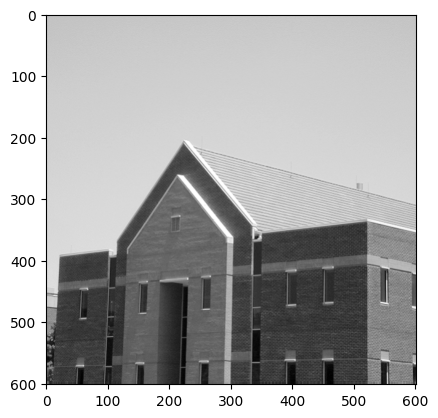

In [2]:
img = cv2.imread("building.tif")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [3]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

#Matrizes

In [4]:
direction_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
direction_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# X

In [5]:
grad_x = cv2.filter2D(img, ddepth, direction_x)

# Y

In [6]:
grad_y = cv2.filter2D(img, ddepth, direction_y)

# X + Y

In [7]:
grad_xy = np.abs(grad_x) + np.abs(grad_y)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


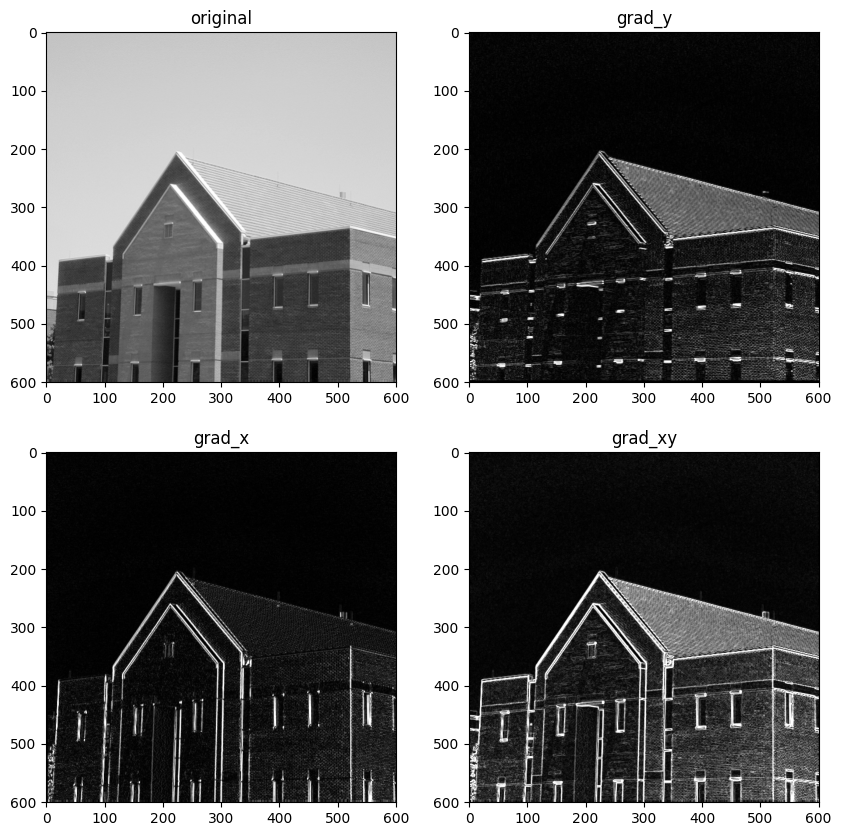

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1), plt.title("original"), plt.imshow(img)
plt.subplot(2,2,2), plt.title("grad_y"), plt.imshow(np.abs(grad_y))
plt.subplot(2,2,3), plt.title("grad_x"), plt.imshow(np.abs(grad_x))
plt.subplot(2,2,4), plt.title("grad_xy"), plt.imshow(grad_xy)
plt.show()

# Gradient Angle Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


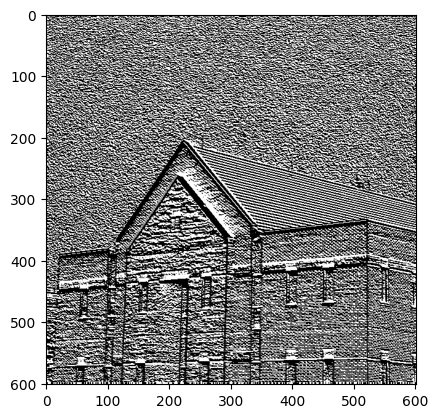

In [9]:
α = np.arctan2(grad_y, grad_x)
plt.imshow(α)

# Smoothing the original image to reduce detection of weak edges:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


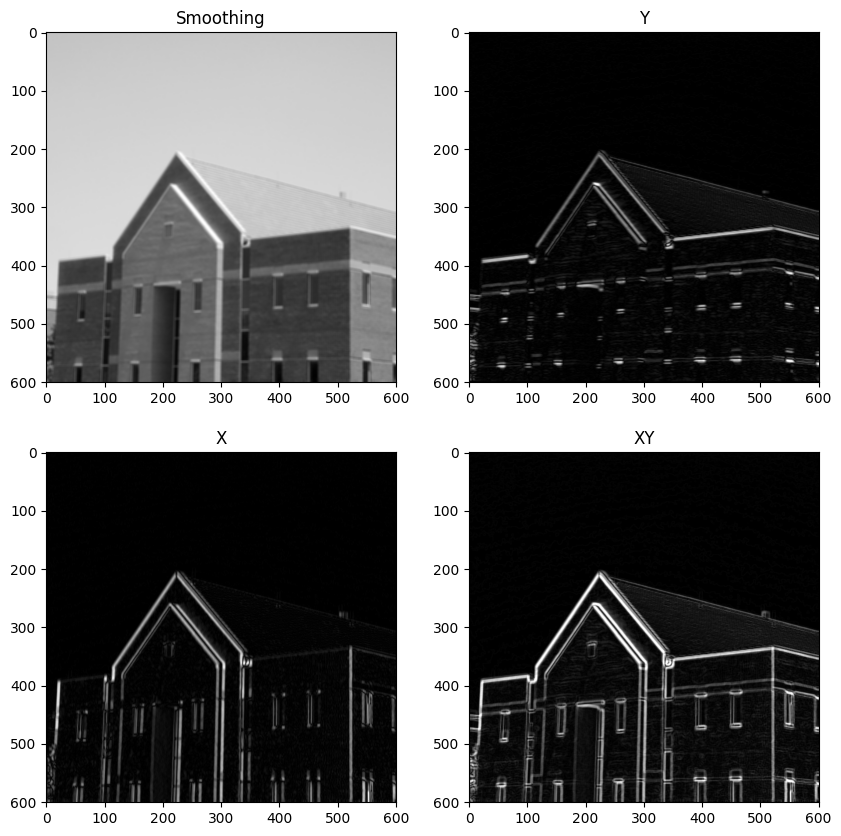

In [10]:
kernel = np.ones((5,5),np.float32)/25
smoothing = cv2.filter2D(img, ddepth, kernel)

#X
smoothing_x = cv2.filter2D(smoothing, ddepth, direction_x)

#Y
smoothing_y = cv2.filter2D(smoothing, ddepth, direction_y)

#XY
smoothing_xy = np.abs(smoothing_x) + np.abs(smoothing_y)

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1), plt.title("Smoothing"), plt.imshow(smoothing)
plt.subplot(2,2,2), plt.title("Y"), plt.imshow(np.abs(smoothing_y))
plt.subplot(2,2,3), plt.title("X"), plt.imshow(np.abs(smoothing_x))
plt.subplot(2,2,4), plt.title("XY"), plt.imshow(smoothing_xy)
plt.show()

# Using diagonal masks:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


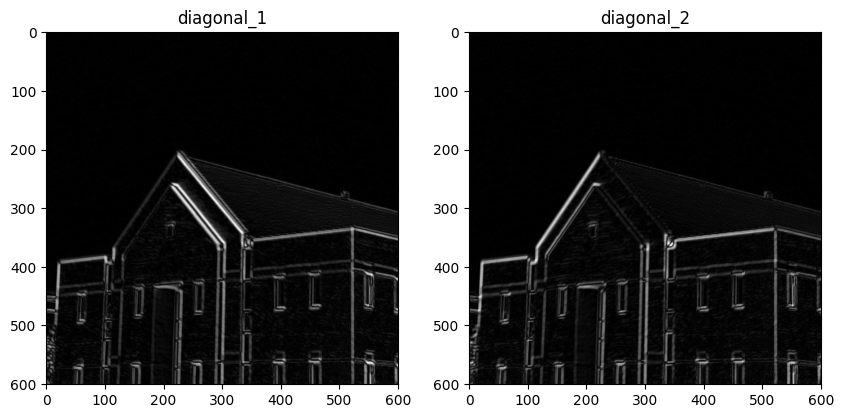

In [11]:
filter = np.array([[0, 1, 2], [-1, 0, 1], [-2, -1, 0]])
diagonal_1 = cv2.filter2D(smoothing, ddepth,filter)

filter = np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])
diagonal_2 = cv2.filter2D(smoothing, ddepth,filter)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1), plt.title("diagonal_1"), plt.imshow(np.abs(diagonal_1))
plt.subplot(1,2,2), plt.title("diagonal_2"), plt.imshow(np.abs(diagonal_2))
plt.show()

# Thresholding the original and smoothed filtered images

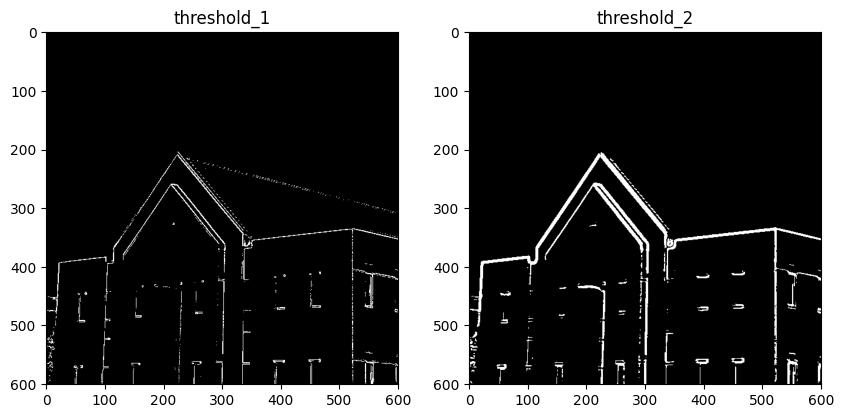

In [12]:
_,thresh1 = cv2.threshold(grad_xy, grad_xy.max()*0.33, 255,cv2.THRESH_BINARY)

_,thresh2 = cv2.threshold(smoothing_xy, smoothing_xy.max()*0.33, 255,cv2.THRESH_BINARY)

thresh1 = thresh1.astype("uint8")
thresh2 = thresh2.astype("uint8")

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1), plt.title("threshold_1"), plt.imshow(thresh1)
plt.subplot(1,2,2), plt.title("threshold_2"), plt.imshow(thresh2)
plt.show()